# Channel cross-section evolution


## Python setup

In [1]:
import bedrockriver as br, sympy as sy, numpy as np, matplotlib.pyplot as plt
sy.init_printing(pretty_print=True,wrap_line=True)
from symbols import *

In [2]:
sm = br.sinuosity.bend_model()

## Recipe

1. Fix base width $w$, slope $\beta_0$, sinuosity $\chi=0$
2. Fix wall angle $\psi=\pi/2$ thus imposing simple initial rectangular cross-section

Loop:
3. Compute flow speed $u$ and flow depth $d$
4. Compute bedload flux $q_b$
5. Compute suspended load flux profile fractions at (i) wall-base corner $q_c$ (ii) remainder above corner $q_w$
6. Optionally compute wall & corner weathering rates to modulate their erodibility
7. Compute base wear rate $\xi_b$, corner wear rate $\xi_c$ and wall wear rate $\xi_w$
8. Compute base-corner vector $\vec{\xi}_{bc}$, base-corner vector dip (from vertical) $\phi$
9. Convert into rate of change of base channel width $\dot{w}$;  secondarily compute base elevation $\dot{h}$
10. Compute wall base-corner-driven motion vector $\vec{\xi}_{wc}$ and wall rotation rate $\dot{\psi}$
11. Time step by $\Delta{t}$ the ODE system $(\dot{w}, \dot{\psi})$ of rates of change of channel base width and wall dip; secondarily evolve base elevation $\dot{h}$ 
12. Repeat

## Numerical exploration

### Parameters

In [3]:
sm.get_params()

In [4]:
sm.set_params(  {theta:sm.pi/4, Omega_r:10} )
sm.set_params(  {epsilon_r:0.1} )
sm.set_params(  {u_i:5,d_i:30} )

### Channel base width and wall tilt evolution: $\{\dot{w},\dot\psi\}(t)$

In [5]:
sm.reset_params()
sm.set_params(  {Q:250,mu:0.2,eta:2} )
sm.get_params()
w_range = (0.1,300)
import numpy as np
(ode_integrations_list, t_w_chi_beta0_vecs_list, 
 w_chi_beta0_interp_as_t_list, t_w_chi_beta0_resampled_vecs_list) \
  = sm.ode_integrate_w_chi_beta0(t_span=[0.0,1500],
                                 initial_state=np.array([50,0.05,0.001]))

In [6]:
t_w_chi_beta0_resampled_vecs_list.round(4)
np.mean(t_w_chi_beta0_resampled_vecs_list[:,3])
sm.get_params({beta_0:None, Q:None})

array([[0.00000e+00, 5.00000e+01, 5.00000e-02, 1.00000e-03],
       [7.50000e+01, 3.95683e+01, 5.63000e-02, 1.50000e-03],
       [1.50000e+02, 2.99774e+01, 6.31000e-02, 1.90000e-03],
       [2.25000e+02, 2.42330e+01, 7.05000e-02, 2.30000e-03],
       [3.00000e+02, 2.15351e+01, 7.82000e-02, 2.70000e-03],
       [3.75000e+02, 2.00554e+01, 8.63000e-02, 3.00000e-03],
       [4.50000e+02, 1.90313e+01, 9.46000e-02, 3.30000e-03],
       [5.25000e+02, 1.82372e+01, 1.03200e-01, 3.60000e-03],
       [6.00000e+02, 1.75921e+01, 1.12000e-01, 3.90000e-03],
       [6.75000e+02, 1.70543e+01, 1.21100e-01, 4.10000e-03],
       [7.50000e+02, 1.65966e+01, 1.30300e-01, 4.40000e-03],
       [8.25000e+02, 1.62035e+01, 1.39800e-01, 4.60000e-03],
       [9.00000e+02, 1.58671e+01, 1.49400e-01, 4.90000e-03],
       [9.75000e+02, 1.55695e+01, 1.59200e-01, 5.10000e-03],
       [1.05000e+03, 1.53040e+01, 1.69200e-01, 5.30000e-03],
       [1.12500e+03, 1.50680e+01, 1.79200e-01, 5.50000e-03],
       [1.20000e+03, 1.4

In [7]:
sm.reset_params()
sm.set_params(  {Q:3000,mu:1,eta:2} )
sm.get_params()
w_range = (0.1,300)
import numpy as np
(ode_integrations_list, t_w_chi_beta0_vecs_list, 
 w_chi_beta0_interp_as_t_list, t_w_chi_beta0_resampled_vecs_list) \
  = sm.ode_integrate_w_chi_beta0(t_span=[0.0,1500],
                                 initial_state=np.array([50,0.05,0.001]))

In [8]:
t_w_chi_beta0_resampled_vecs_list.round(4)
np.mean(t_w_chi_beta0_resampled_vecs_list[:,3])
sm.get_params({beta_0:5, Q:None})
sm.get_params()

array([[0.000000e+00, 5.000000e+01, 5.000000e-02, 1.000000e-03],
       [7.500000e+01, 3.361739e+02, 1.065900e+00, 4.000000e-04],
       [1.500000e+02, 4.485633e+02, 1.858700e+00, 5.000000e-04],
       [2.250000e+02, 5.205603e+02, 2.462900e+00, 6.000000e-04],
       [3.000000e+02, 5.712727e+02, 2.965400e+00, 7.000000e-04],
       [3.750000e+02, 6.089038e+02, 3.403800e+00, 8.000000e-04],
       [4.500000e+02, 6.377787e+02, 3.798000e+00, 9.000000e-04],
       [5.250000e+02, 6.603850e+02, 4.159400e+00, 1.100000e-03],
       [6.000000e+02, 6.781765e+02, 4.494700e+00, 1.200000e-03],
       [6.750000e+02, 6.922296e+02, 4.809000e+00, 1.300000e-03],
       [7.500000e+02, 7.032362e+02, 5.105300e+00, 1.400000e-03],
       [8.250000e+02, 7.120845e+02, 5.387800e+00, 1.500000e-03],
       [9.000000e+02, 7.191171e+02, 5.658200e+00, 1.600000e-03],
       [9.750000e+02, 7.246092e+02, 5.917700e+00, 1.700000e-03],
       [1.050000e+03, 7.288984e+02, 6.167800e+00, 1.800000e-03],
       [1.125000e+03, 7.3

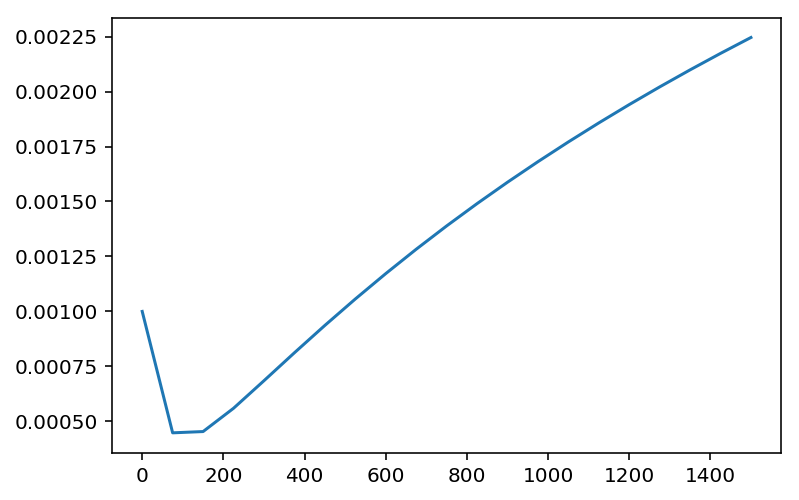

In [9]:
plt.plot(t_w_chi_beta0_resampled_vecs_list[:,0],
         t_w_chi_beta0_resampled_vecs_list[:,3]);